Initial Shape: (41629, 9)
Shape after dropping NA rows: (41629, 8)

Polynomial Regression (Degree 2) R-squared (R²): 0.8759
Polynomial Regression (Degree 2) MAE: 982.50


C:\Users\anusr\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


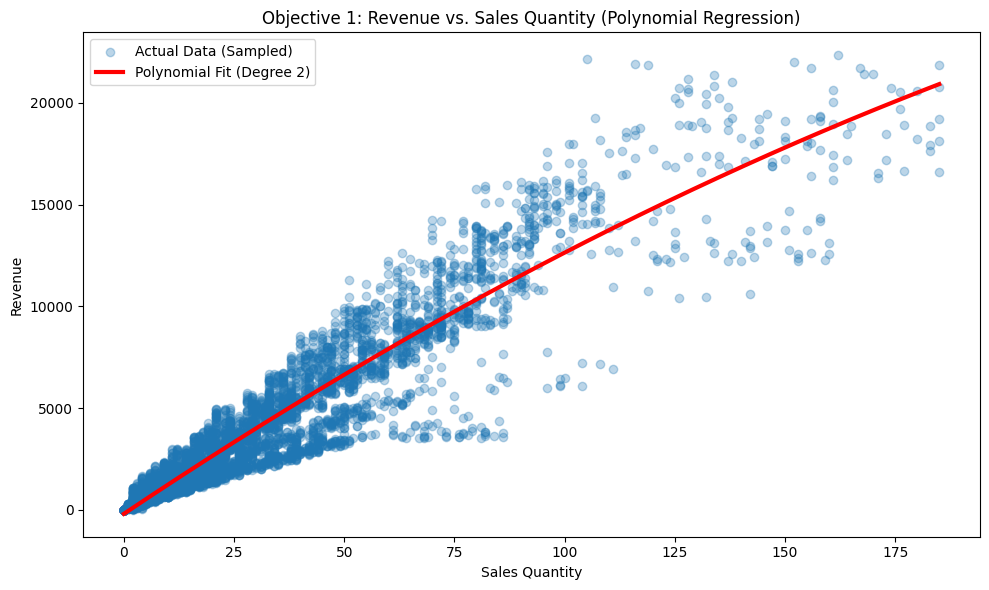

In [25]:
#importing Libra
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Loadding and cleaning the dataset
df = pd.read_csv("C:/Users/anusr/Downloads/department_store_dataset.csv")
print(f"Initial Shape: {df.shape}")
df.head()
df.info()
print(df.isnull().sum())
print(f"Total duplicate rows: {df.duplicated().sum()}")
#objective1 : To visualize Revenue vs. Sales Quantity
features_poly = ['Sales Quantity']
target_poly = 'Revenue'

df_poly = df.dropna(subset=features_poly + [target_poly])
X_poly = df_poly[features_poly]
y_poly = df_poly[target_poly]
poly = PolynomialFeatures(degree=2)
X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
    X_poly, y_poly, test_size=0.2, random_state=42
)

X_train_poly_2d = poly.fit_transform(X_train_poly)
X_test_poly_2d = poly.transform(X_test_poly) 

model_poly = LinearRegression()
model_poly.fit(X_train_poly_2d, y_train_poly)


y_pred_poly = model_poly.predict(X_test_poly_2d)


r2_poly = r2_score(y_test_poly, y_pred_poly)
mae_poly = mean_absolute_error(y_test_poly, y_pred_poly)

print(f"Polynomial Regression (Degree 2) R-squared (R²): {r2_poly:.4f}")
print(f"Polynomial Regression (Degree 2) MAE: {mae_poly:,.2f}")


plt.figure(figsize=(10, 6))

df_sample = df_poly.sample(n=5000, random_state=42)
plt.scatter(df_sample['Sales Quantity'], df_sample['Revenue'], alpha=0.3, label='Actual Data (Sampled)')
X_fit = np.linspace(X_poly.min(), X_poly.max(), 500).reshape(-1, 1)
X_fit_2d = poly.transform(X_fit)
y_fit = model_poly.predict(X_fit_2d)

plt.plot(X_fit, y_fit, color='red', linewidth=3, label='Polynomial Fit (Degree 2)')
plt.title('Objective 1: Revenue vs. Sales Quantity (Polynomial Regression)')
plt.xlabel('Sales Quantity')
plt.ylabel('Revenue')
plt.legend()
plt.tight_layout()
plt.show()

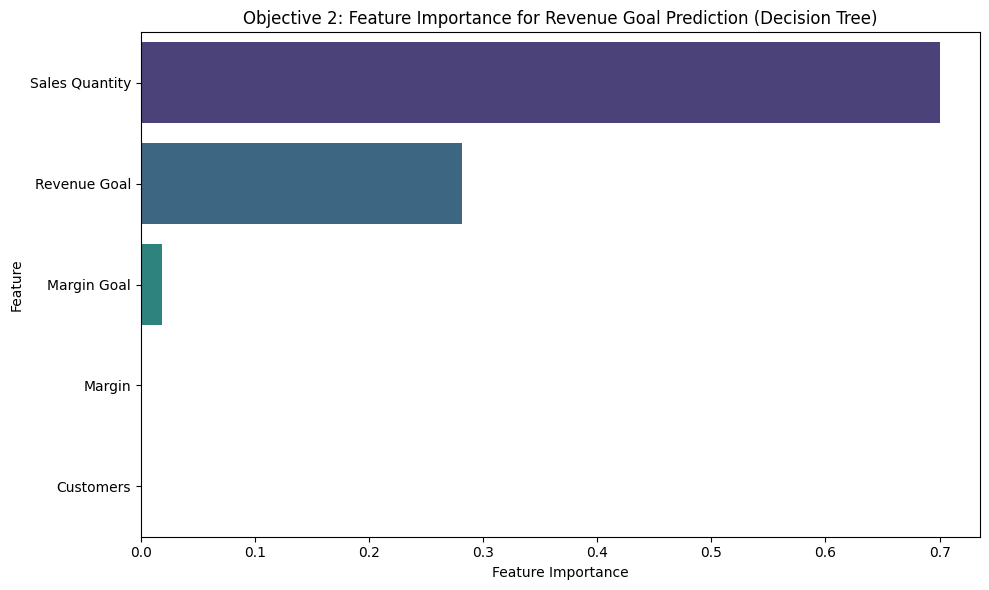

Feature importance plot generated using the corrected Seaborn syntax.


In [6]:
#Objective2: To visualise feature importance and classification boundariesand predict Revenue Goal achievement using a Decision Tree model.

df['Revenue_Goal_Met'] = (df['Revenue'] >= df['Revenue Goal']).astype(int)


features_dt = ['Sales Quantity', 'Customers', 'Margin', 'Revenue Goal', 'Margin Goal']
target_dt = 'Revenue_Goal_Met'

df_dt = df.dropna(subset=features_dt + [target_dt])
X_dt = df_dt[features_dt]
y_dt = df_dt[target_dt]
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, y_dt, test_size=0.2, random_state=42, stratify=y_dt
)
model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
model_dt.fit(X_train_dt, y_train_dt)


importance = model_dt.feature_importances_
feature_names = X_dt.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
# CORRECTED LINE: Assign 'Feature' to 'hue' and set legend=False to resolve the FutureWarning
sns.barplot(x='Importance', y='Feature', data=importance_df, hue='Feature', palette='viridis', legend=False)
plt.title('Objective 2: Feature Importance for Revenue Goal Prediction (Decision Tree)')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("Feature importance plot generated using the corrected Seaborn syntax.")

Logistic Regression Accuracy: 0.9497
Logistic Regression Precision: 0.9062


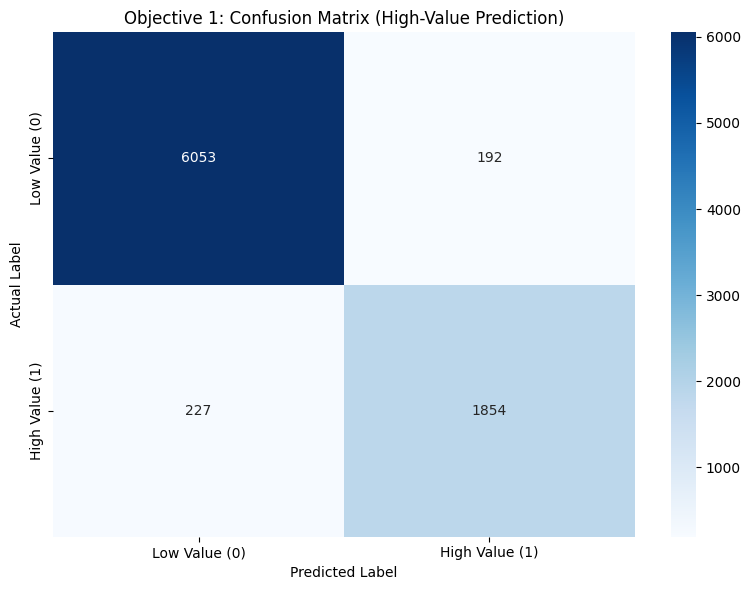

In [19]:
# Objective 3:To visualise the performance of the Logistic Regression model in classifying High-Value transactions using a Confusion Matrix.
revenue_threshold = df['Revenue'].quantile(0.75)
df['High_Value'] = (df['Revenue'] > revenue_threshold).astype(int)

# Features and Target
features_hv = ['Sales Quantity', 'Customers', 'Margin', 'Revenue Goal', 'Margin Goal']
target_hv = 'High_Value'

df_hv = df.dropna(subset=features_hv + [target_hv])
X_hv = df_hv[features_hv]
y_hv = df_hv[target_hv]

X_train_hv, X_test_hv, y_train_hv, y_test_hv = train_test_split(
    X_hv, y_hv, test_size=0.2, random_state=42, stratify=y_hv
)

scaler_hv = StandardScaler()
X_train_scaled_hv = scaler_hv.fit_transform(X_train_hv)
X_test_scaled_hv = scaler_hv.transform(X_test_hv)


model_lr = LogisticRegression(random_state=42, solver='liblinear')
model_lr.fit(X_train_scaled_hv, y_train_hv)
y_pred_lr = model_lr.predict(X_test_scaled_hv)


accuracy_lr = accuracy_score(y_test_hv, y_pred_lr)
precision_lr = precision_score(y_test_hv, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test_hv, y_pred_lr)

print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(f"Logistic Regression Precision: {precision_lr:.4f}")
# 5. Visualization: Confusion Matrix (REQUIRED)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low Value (0)', 'High Value (1)'],
            yticklabels=['Low Value (0)', 'High Value (1)'])
plt.title('Objective 1: Confusion Matrix (High-Value Prediction)')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

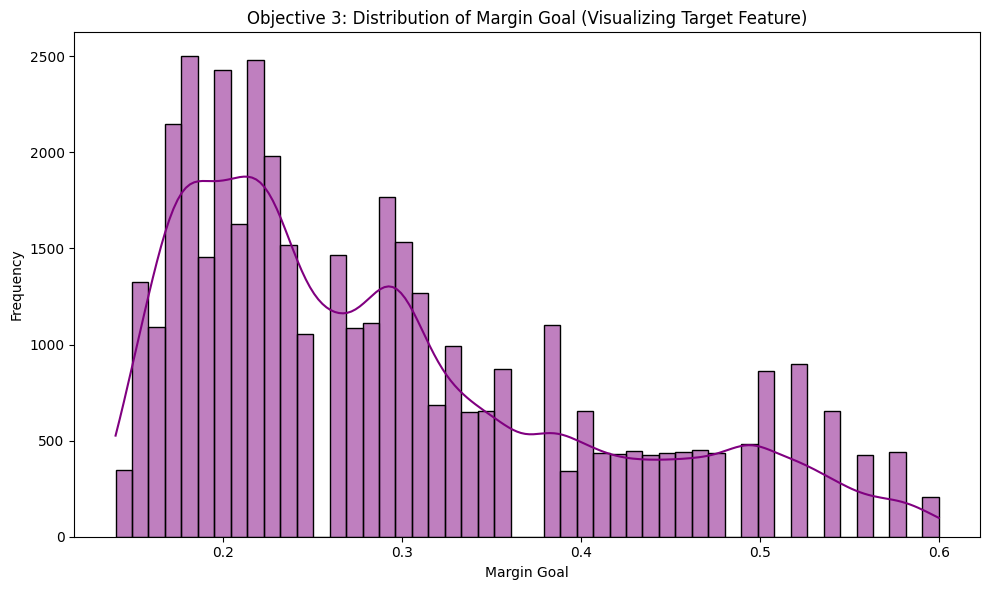

In [21]:
# Objective 4: To visualise the distribution of the 'Margin Goal' feature.
df['Margin_Goal_Met'] = (df['Margin'] >= df['Margin Goal']).astype(int)

# Features and Target
features_mg = ['Revenue', 'Sales Quantity', 'Customers']
target_mg = 'Margin_Goal_Met'

df_mg = df.dropna(subset=features_mg + [target_mg])
X_mg = df_mg[features_mg]
y_mg = df_mg[target_mg]

X_train_mg, X_test_mg, y_train_mg, y_test_mg = train_test_split(
    X_mg, y_mg, test_size=0.2, random_state=42, stratify=y_mg
)

# 2. Visualization: Histogram (REQUIRED) - Before scaling
plt.figure(figsize=(10, 6))
sns.histplot(df_mg['Margin Goal'], bins=50, kde=True, color='purple')
plt.title('Objective 3: Distribution of Margin Goal (Visualizing Target Feature)')
plt.xlabel('Margin Goal')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

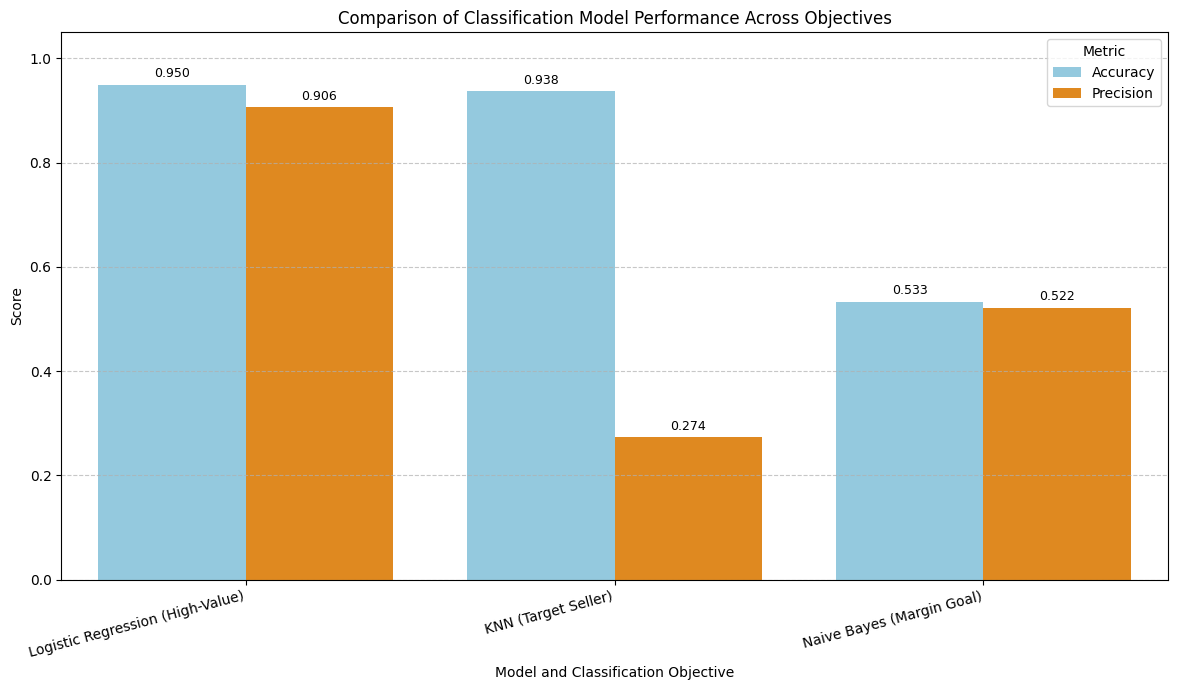

In [22]:
#Objective 5: To visualise the comparison of classification model performance (Accuracy and Precision) across different business objectives.

comparison_data = {
    'Objective/Model': [
        'Logistic Regression (High-Value)',
        'KNN (Target Seller)',
        'Naive Bayes (Margin Goal)'
    ],
    'Accuracy': [0.9497, 0.9377, 0.5333],
    'Precision': [0.9062, 0.2737, 0.5219]
}


comparison_df = pd.DataFrame(comparison_data)


comparison_melted = comparison_df.melt(
    id_vars='Objective/Model',
    value_vars=['Accuracy', 'Precision'],
    var_name='Metric',
    value_name='Score'
)

#  3. Visualization: Grouped Bar Chart ---
plt.figure(figsize=(12, 7))

ax = sns.barplot(
    x='Objective/Model',
    y='Score',
    hue='Metric',
    data=comparison_melted,
    palette={'Accuracy': 'skyblue', 'Precision': 'darkorange'}
)


for container in ax.containers:
    ax.bar_label(container, fmt='%.3f', label_type='edge', padding=3, fontsize=9)

plt.ylim(0, 1.05)
plt.title('Comparison of Classification Model Performance Across Objectives')
plt.xlabel('Model and Classification Objective')
plt.ylabel('Score')
plt.xticks(rotation=15, ha='right')
plt.legend(title='Metric')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()